# nvImageCodec with TensorFlow

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import cupy as cp


Set lower log level and import tensorflow

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

Import nvImageCodec

In [3]:
from nvidia import nvimgcodec

Setting resource folder

In [4]:
resources_dir = os.getenv("PYNVIMGCODEC_EXAMPLES_RESOURCES_DIR", "../assets/images/")

Created nvImageCodec Decoder

In [5]:
decoder = nvimgcodec.Decoder()

Decode JPEG2000 file 

In [6]:
nv_img = decoder.read(resources_dir + "cat-1046544_640.jp2")

Transfer image to Host memory and display using matplotlib.pyplot

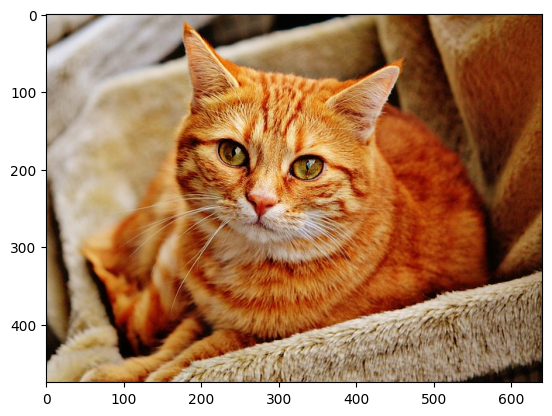

In [7]:
plt.imshow(nv_img.cpu())

Zero-copy convertion of Image to tensor using DLPack

In [8]:
cap = nv_img.to_dlpack()
tf_img = tf.experimental.dlpack.from_dlpack(cap)
print("device:", tf_img.device)
print("dtype of tensor:", tf_img.dtype)

device: /job:localhost/replica:0/task:0/device:GPU:0
dtype of tensor: <dtype: 'uint8'>


Lets flip tensor

In [9]:
tf_img_flip = tf.image.flip_up_down(tf_img)

Pass tensor to cuPy and then to numpy to show flipped image

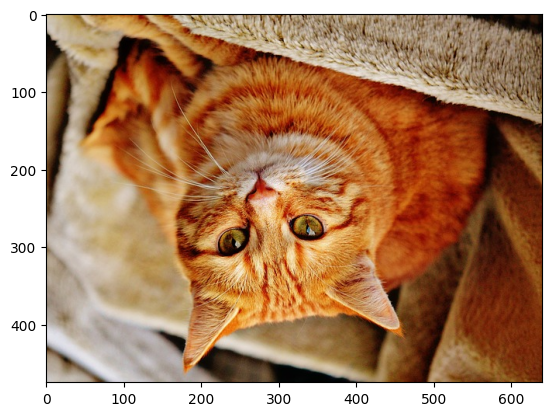

In [10]:
cp_img = cp.from_dlpack(tf.experimental.dlpack.to_dlpack(tf_img_flip))
np_img = cp.asnumpy(cp_img)
plt.imshow(np_img)

Zero-copy convertion of  tensor back to Image  

In [11]:
cap = tf.experimental.dlpack.to_dlpack(tf_img_flip)
nv_flipped_img = nvimgcodec.as_image(cap)

Save as Jpeg2000

In [12]:
encoder = nvimgcodec.Encoder()
encoder.write("tf_flipped.j2k", nv_flipped_img)

Load with OpenCV to verify

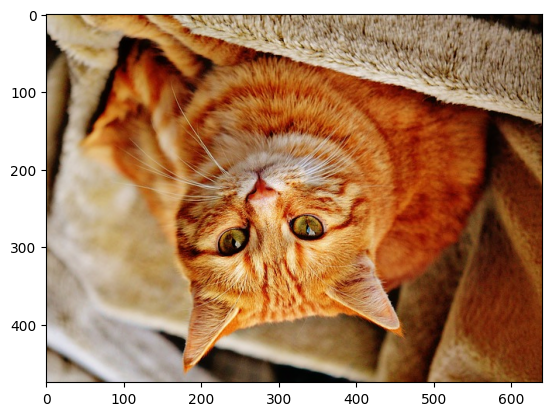

In [13]:
image = cv2.imread("tf_flipped.j2k")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)